<a href="https://colab.research.google.com/github/vincimech010233/QuantumComputingJourney-/blob/main/All_About_Qubits_Codercise_Pennylane_with_Qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 12.9 MB/s eta 0:00:00


In [3]:
!pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 30.9 MB/s eta 0:00:00


In [4]:
import numpy as np
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector

In [5]:
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

In [6]:
def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        np.array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """

    norm = np.sqrt(abs(alpha)**2 + abs(beta)**2)
    kappa = 1 / norm

    alpha_prime = kappa * alpha
    beta_prime = kappa * beta

    return np.array([alpha_prime, beta_prime])

In [7]:
alpha = 1 + 1j
beta = 1 - 1j
normalized_state = normalize_state(alpha, beta)
print("Estado normalizado:", normalized_state)

state = Statevector(normalized_state)
print("Estado en Qiskit:", state)
print("¿Estado normalizado válido?:", state.is_valid())

Estado normalizado: [0.5+0.5j 0.5-0.5j]
Estado en Qiskit: Statevector([0.5+0.5j, 0.5-0.5j],
            dims=(2,))
¿Estado normalizado válido?: True


In [8]:
def inner_product(state_1, state_2):
    """Compute the inner product between two states.

    Args:
        state_1 (np.array[complex]): A normalized quantum state vector
        state_2 (np.array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """

    bra_state_1 = np.conjugate(state_1)
    inner_prod = np.dot(bra_state_1, state_2)
    return inner_prod

ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")

<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


In [10]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(1)
statevector = Statevector.from_instruction(qc)
print("Estado |0> usando Qiskit:", statevector)

qc.x(0)
statevector = Statevector.from_instruction(qc)
print("Estado |1> usando Qiskit:", statevector)

Estado |0> usando Qiskit: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Estado |1> usando Qiskit: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [13]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


def measure_state(state, num_meas):
    """Simulate a quantum measurement process using Qiskit.

    Args:
        state (np.array[complex]): A normalized qubit state vector.
        num_meas (int): The number of measurements to take

    Returns:
        np.array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability
        distribution defined by the input state.
    """
    norm = np.linalg.norm(state)
    if norm == 0:
        raise ValueError("Cannot measure a zero vector")
    normalized_state = state / norm

    qc = QuantumCircuit(1, 1)

    qc.initialize(normalized_state, 0)

    qc.measure(0, 0)

    simulator = AerSimulator()

    result = simulator.run(qc, shots=num_meas).result()
    counts = result.get_counts(qc)

    measurement_results = []
    for outcome, count in counts.items():
        measurement_results.extend([int(outcome)] * count)

    return np.array(measurement_results)

alpha = 1 + 1j
beta = 1 - 1j
state = np.array([alpha, beta])
num_meas = 100
measurement_results = measure_state(state, num_meas)
print("Resultados de las mediciones:", measurement_results)

Resultados de las mediciones: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [22]:
from qiskit import transpile
from qiskit.quantum_info import Statevector


U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def apply_u(state):
    """Apply a quantum operation using Qiskit.

    Args:
        state (np.array[complex]): A normalized quantum state vector.

    Returns:
        np.array[complex]: The output state after applying U.
    """
    qc = QuantumCircuit(1)

    qc.initialize(state, 0)

    qc.unitary(U, [0])

    simulator = AerSimulator()

    qc.save_statevector()

    transpiled_qc = transpile(qc, simulator)
    result = simulator.run(transpiled_qc).result()

    final_state = result.get_statevector(qc)

    return final_state

state = np.array([1, 0]) / np.sqrt(1)
new_state = apply_u(state)
print("Nuevo estado:", new_state)

Nuevo estado: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


Resultados de las mediciones: {'1': 52, '0': 48}


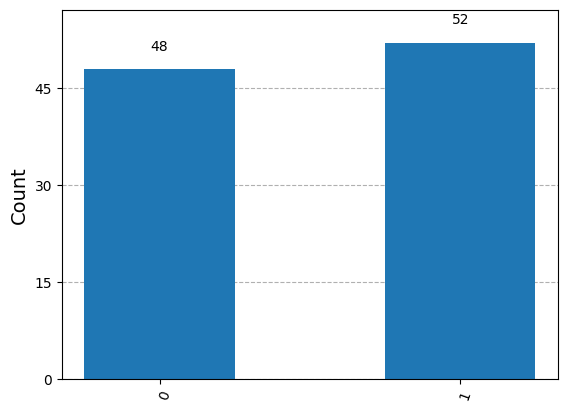

In [23]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def initialize_state():
    """Prepare a qubit in state |0>.

    Returns:
        np.array[float]: the vector representation of state |0>.
    """
    return np.array([1.0, 0.0])

def apply_u(state):
    """Apply a quantum operation."""
    qc = QuantumCircuit(1)
    qc.initialize(state, 0)
    qc.unitary(U, [0])
    return qc

def measure_state(qc, num_meas):
    """Measure a quantum state num_meas times."""
    qc.measure_all()
    simulator = AerSimulator()
    transpiled_qc = transpile(qc, simulator)
    result = simulator.run(transpiled_qc, shots=num_meas).result()
    counts = result.get_counts()
    return counts

def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.

    Try and do so using three lines of code or less!

    Returns:
        np.array[int]: the measurement results after running the algorithm 100 times
    """
    state = initialize_state()
    qc = apply_u(state)
    measurement_results = measure_state(qc, 100)
    return measurement_results


measurement_results = quantum_algorithm()
print("Resultados de las mediciones:", measurement_results)
plot_histogram(measurement_results)